In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-e7b067db-0461-a12e-92df-f6e70d0c37ac)


In [ ]:
# !pip3 install datascience albumentations pyarrow==0.17.1 transformers==3.0.2 fastai2==0.0.20 ohmeow-blurr==0.0.7
# !pip3 install -U datascience albumentations pyarrow transformers fastai ohmeow-blurr

     |████████████████████████████████| 721 kB 1.6 MB/s 
     |████████████████████████████████| 102 kB 46.1 MB/s 
     |████████████████████████████████| 25.6 MB 63.5 MB/s 
     |████████████████████████████████| 3.4 MB 42.2 MB/s 
     |████████████████████████████████| 189 kB 51.5 MB/s 
     |████████████████████████████████| 91 kB 9.4 MB/s 
     |████████████████████████████████| 95 kB 4.2 MB/s 
     |████████████████████████████████| 47.7 MB 107 kB/s 
     |████████████████████████████████| 895 kB 30.2 MB/s 
     |████████████████████████████████| 3.3 MB 29.9 MB/s 
     |████████████████████████████████| 61 kB 496 kB/s 
     |████████████████████████████████| 596 kB 46.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 306 kB 43.2 MB/s 
     |████████████████████████████████| 1.2 MB 51.6 MB/s 
     |████████████████████████████████| 43 kB 1.9 MB/s 
     |████████████████████████████████| 243 kB 47.2 MB/s 
     |██████████████████

In [2]:
!pip3 install -U transformers fastai ohmeow-blurr

     |████████████████████████████████| 3.4 MB 5.4 MB/s 
     |████████████████████████████████| 189 kB 45.4 MB/s 
     |████████████████████████████████| 91 kB 10.1 MB/s 
     |████████████████████████████████| 61 kB 517 kB/s 
     |████████████████████████████████| 895 kB 49.2 MB/s 
     |████████████████████████████████| 596 kB 44.3 MB/s 
     |████████████████████████████████| 3.3 MB 37.3 MB/s 
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 1.2 MB 48.1 MB/s 
     |████████████████████████████████| 306 kB 52.3 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 243 kB 46.4 MB/s 
     |████████████████████████████████| 132 kB 50.1 MB/s 
     |████████████████████████████████| 1.1 MB 48.4 MB/s 
     |████████████████████████████████| 160 kB 51.6 MB/s 
     |████████████████████████████████| 192 kB 48.7 MB/s 
     |████████████████████████████████| 271 kB 46.8 MB/s 
  Created wheel for se

In [ ]:
# %load_ext autoreload
# %autoreload 2

In [3]:
from collections import Counter, defaultdict
import json
from pathlib import Path
import re

# import matplotlib.pyplot as plt
import pandas as pd

# # %config InlineBackend.figure_formats = {'png', 'retina'}
# # plt.rcParams['figure.dpi'] = 220
# %config InlineBackend.figure_formats = {'svg', 'retina'}

# # Stylize the plot of `lr_find()`
# plt.style.use(['dark_background','seaborn-poster','seaborn-deep'])
# plt.rcParams['axes.grid'] = True
# plt.rcParams['axes.grid.axis'] = 'x'
# plt.rcParams['axes.grid.which'] = 'both'
# plt.rcParams['grid.alpha'] = 0.5
# plt.rcParams['grid.color'] = 'xkcd:lime green'
# plt.rcParams['grid.linestyle'] = ':'

import torch
from transformers import *
from fastai.text.all import *

from blurr.data.all import *
from blurr.modeling.all import *

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# DATA_DIR = Path('/content/drive/My Drive/colab_data/FinNum-2/')
# DATA_DIR.mkdir(parents=True, exist_ok=True)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# trn_json_f = open('/content/drive/MyDrive/NTPUIM/NTCIR/FinNUM 3/Dataset/FinNum-3_ConCall_train.json')
trn_json_f = open('/content/drive/MyDrive/FinNUM_dataset/FinNum-3_ConCall_train.json')
trn_json = json.load(trn_json_f)
trn_json_f.close()

# EDA for FinNum-2 Training Set

## ETL

In [ ]:
#tweet_tags_map--> paragraph & Category 
#tag_cntr-->category 

para_catgy = defaultdict(lambda: defaultdict(list))
category_ = Counter()
claim_num = Counter()
for d in trn_json:
    paragraph = d['paragraph']
    category = d['category']
    del d['paragraph']
    del d['category']
    para_catgy[paragraph][category].append(d)
    category_[category] += 1
    claim_num[d['claim']] += 1

print('category: ',category_)
print('para_catgy: ',para_catgy )
print('claim_num: ', claim_num)

category:  Counter({'relative': 2089, 'date': 1616, 'money': 1496, 'quantity_absolute': 1193, 'absolute': 683, 'other': 406, 'change': 398, 'product number': 235, 'quantity_relative': 178, 'ranking': 35, 'time': 8})
para_catgy:  defaultdict(<function <lambda> at 0x7fe4e29c6cb0>, {"Good day and welcome to the Apple Inc. Third Quarter Fiscal Year 2018 Earnings Conference Call. Today's call is being recorded.": defaultdict(<class 'list'>, {'date': [{'target_num': '2018', 'offset_start': 65, 'offset_end': 69, 'claim': 0}]}), "Please note that some of the information you'll hear during our discussion today will consist of forward-looking statements including without limitation those regarding revenue gross margin operating expenses other income and expense taxes capital allocation share repurchases dividends and future business outlook. Actual results or trends could differ materially from our forecast. For more information please refer to the risk factors discussed in Apple's most recently

In [ ]:
# tweet_tags_map = defaultdict(lambda: defaultdict(list))
# tag_cntr = Counter()
# relation_cntr = Counter()
# for d in trn_json:
#     txt = d['tweet']
#     cashtag = d['target_cashtag']
#     del d['tweet']
#     del d['target_cashtag']
#     tweet_tags_map[txt][cashtag].append(d)
#     tag_cntr[cashtag] += 1
#     relation_cntr[d['relation']] += 1

## Basic Statistics

In [ ]:
# tweet_cnt = len(tweet_tags_map)
# print(f'#(tweets)\t= {tweet_cnt}')
# print(f'#(tag_types)\t= {len(tag_cntr)}')
# print(f'\ttop-5 tag usages: {tag_cntr.most_common(5)}')
# print(f'#(relations)\t= {len(trn_json)}')
# print(f'\trelation types: {relation_cntr}')

#(tweets)	= 4165
#(tag_types)	= 1472
	top-5 tag usages: [('BTC.X', 196), ('SPY', 158), ('QQQ', 136), ('DPW', 107), ('AMD', 90)]
#(relations)	= 7187
	relation types: Counter({1: 5827, 0: 1360})


In [ ]:
# tag_df = pd.DataFrame(tag_cntr.items(), columns=['tag', '#(tag_usages)'])

,#(tag_usages)
count,1472.000000
mean,4.882473
std,11.005303
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,196.000000


[Text(0, 0.5, '#(#(tag_usages))'), Text(0.5, 0, '#(tag_usages)')]

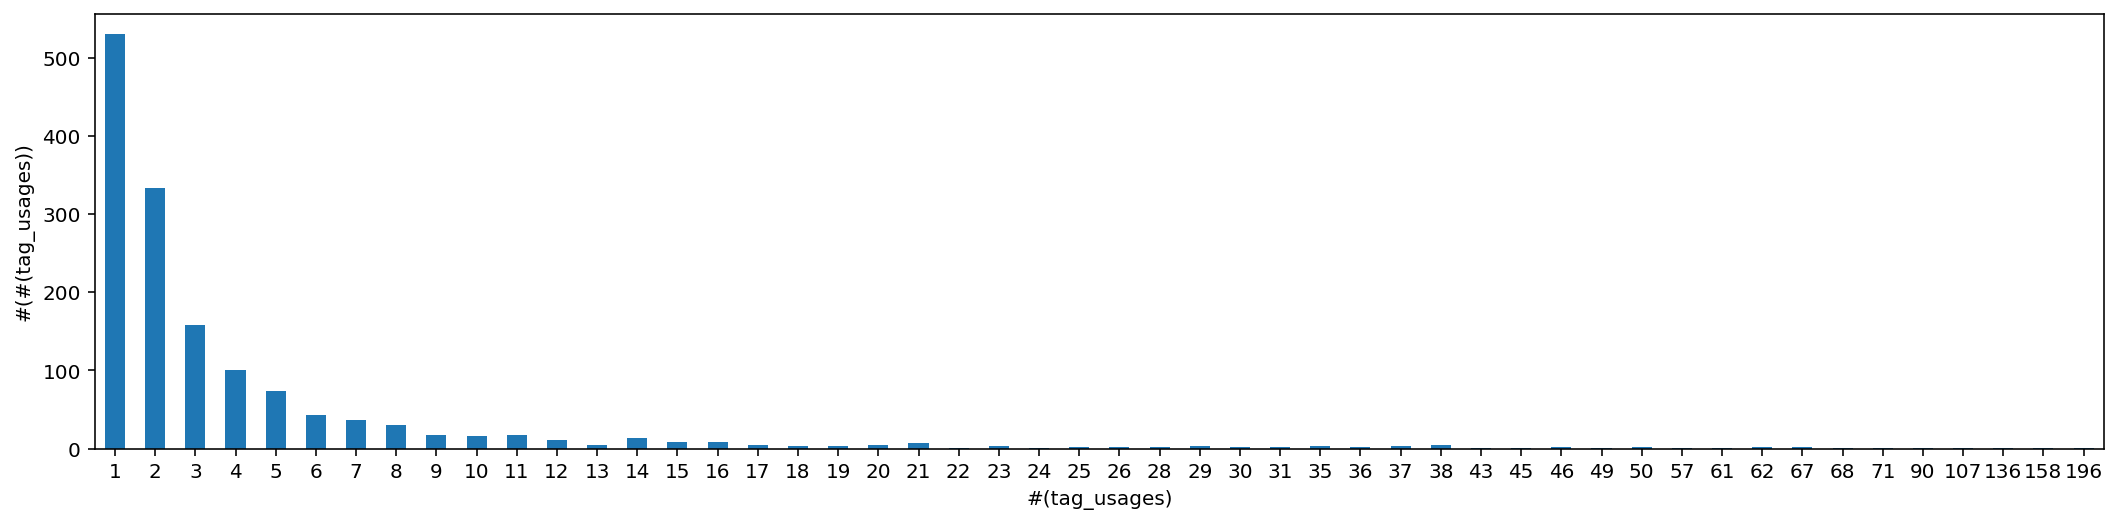

In [ ]:
# display(tag_df.describe())
# tag_df['#(tag_usages)'].value_counts().sort_index().plot(
#     kind='bar', figsize=(18, 4), rot=0).set(xlabel='#(tag_usages)', ylabel='#(#(tag_usages))')

## Multi-tag Tweets

In [ ]:
# multitag_tweet_map_except_id = {
#     txt: tags for txt, tags in tweet_tags_map.items()
#     if len(tags) > 1 and 'in ID' not in tags or len(tags) > 2 and 'in ID' in tags
# }
# multitag_tweet_cnt = len(multitag_tweet_map_except_id)
# print(f'#(multitag_tweets) = {multitag_tweet_cnt} ({multitag_tweet_cnt/tweet_cnt:.2%} of tweets)\n')

#(multitag_tweets) = 279 (6.70% of tweets)



In [ ]:
# preview_cnt = 2
# for i, (txt, tags) in enumerate(multitag_tweet_map_except_id.items()):
#     if i >= preview_cnt:
#         break
#     print(f'{txt}')
#     for tag, relations in tags.items():
#         print(f'<{tag}>:')
#         for relation in relations:
#             print(f'\t{relation}')
#     print()

$PANL Funny guys be careful fake trader try to kill you because they bought from high price  im sending last trades 
19:36:10 $ 5.20 10
<>:
	{'target_num': '5.20', 'offset': 128, 'relation': 1}
	{'target_num': '10', 'offset': 133, 'relation': 1}
<PANL>:
	{'target_num': '19', 'offset': 117, 'relation': 0}
	{'target_num': '36', 'offset': 120, 'relation': 0}
	{'target_num': '10', 'offset': 123, 'relation': 0}

$DIS deal 4 $FOXA~13x EV/EBITDA, $VIAB may deserve a dsct but 7x way too cheap-staying Long
<DIS>:
	{'target_num': '13', 'offset': 18, 'relation': 1}
<VIAB>:
	{'target_num': '7', 'offset': 62, 'relation': 1}



## Tweets with `in ID` tags (no need for v3)

In [ ]:
# tweet_with_id_map = {txt: tags for txt, tags in tweet_tags_map.items() if 'in ID' in tags}
# tweet_with_id_cnt = len(tweet_with_id_map)
# print(f'#(tweets_with_id_tagged) = {tweet_with_id_cnt} ({tweet_with_id_cnt/tweet_cnt:.2%} of tweets)\n')

#(tweets_with_id_tagged) = 0 (0.00% of tweets)



In [ ]:
# preview_cnt = 3
# for i, (txt, tags) in enumerate(tweet_with_id_map.items()):
#     if i >= preview_cnt:
#         break
#     print(f'{txt}')
#     for tag, relations in tags.items():
#         print(f'<{tag}>:')
#         for relation in relations:
#             print(f'\t{relation}')
#     print()

# Preprocess

tweet_tags_map--> paragraph & Category 

***print('category: ',category_)***

tag_cntr-->category 

***print('para_catgy: ',para_catgy )***

relation_cntr-->claim_num

***print('claim_num: ', claim_num)***


In [6]:
SEED = 42

In [7]:
def reset_randomness(seed=SEED):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)  # This implies torch.cuda.manual_seed_all(SEED) now
    # if torch.cuda.is_available(): torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.deterministic = True  # About 15% slower but...
    torch.backends.cudnn.benchmark = False

In [8]:
def insert_tags(df):
    df = df.assign(
        tagged_paragraph=df[['paragraph', 'offset_start']].apply(
            lambda x: x[0][:x[1]] + ' xxnum ' + x[0][x[1]:], axis=1
        )
    )
    # df.tagged_paragraph = df[['tagged_paragraph', 'category']].apply(
    #     lambda x: re.sub(f'(\$({x[1]}))', r'$ xxtag \2', x[0]), axis=1
    # )
    df.tagged_paragraph = '<s> ' + df.tagged_paragraph + ' </s>'
    return df

In [9]:
def yield_double_redaction(
    txt,
    untouchable_token_set,
    redact_change=0.2,
    unk_chance=0.2,
    mask='<mask>',
    unk='<unk>',
    token_delimiter=' ',
    seed=SEED
):
    random.seed(seed)
    chosen_idx_set_list = []
    tkns = txt.split(token_delimiter)
    tkn_idx_set = {
        tkn_idx for tkn_idx, tkn in enumerate(tkns)
        if tkn not in untouchable_token_set
    }
    n_tkn = len(tkn_idx_set)
    n_sample = math.ceil(n_tkn * redact_change)
    while n_sample <= n_tkn:
        chosen_idx_set = set(random.sample(sorted(tkn_idx_set), k=n_sample))
        chosen_idx_set_list += [chosen_idx_set]
        tkn_idx_set -= chosen_idx_set
        n_tkn = len(tkn_idx_set)
    for idx_set in chosen_idx_set_list:
        dr_tkns = tkns.copy()
        for chosen_idx in idx_set:
            noise = unk if random.random() < unk_chance else mask
            dr_tkns[chosen_idx] = noise
        yield token_delimiter.join(dr_tkns)


def double_redact_tagged_finnum_df(df, special_token_set):
    duplicated_rows = []
    for n, row in df.iterrows():
        for redacted_tagged_paragraph in yield_double_redaction(
            row['tagged_paragraph'],
            {row['target_num'], row['category']} | special_token_set, 
        ):
            row['tagged_paragraph'] = redacted_tagged_paragraph
            duplicated_rows += [row.copy()]
    return pd.DataFrame(duplicated_rows)

In [ ]:
# def insert_tags(df):
#     df = df.assign(
#         tagged_tweet=df[['tweet', 'offset']].apply(
#             lambda x: x[0][:x[1]] + ' xxnum ' + x[0][x[1]:], axis=1
#         )
#     )
#     df.tagged_tweet = df[['tagged_tweet', 'target_cashtag']].apply(
#         lambda x: re.sub(f'(\$({x[1]}))', r'$ xxtag \2', x[0]), axis=1
#     )
#     df.tagged_tweet = '<s> ' + df.tagged_tweet + ' </s>'
#     return df

In [ ]:
# def yield_double_redaction(
#     txt,
#     untouchable_token_set,
#     redact_change=0.2,
#     unk_chance=0.2,
#     mask='<mask>',
#     unk='<unk>',
#     token_delimiter=' ',
#     seed=SEED
# ):
#     random.seed(seed)
#     chosen_idx_set_list = []
#     tkns = txt.split(token_delimiter)
#     tkn_idx_set = {
#         tkn_idx for tkn_idx, tkn in enumerate(tkns)
#         if tkn not in untouchable_token_set
#     }
#     n_tkn = len(tkn_idx_set)
#     n_sample = math.ceil(n_tkn * redact_change)
#     while n_sample <= n_tkn:
#         chosen_idx_set = set(random.sample(sorted(tkn_idx_set), k=n_sample))
#         chosen_idx_set_list += [chosen_idx_set]
#         tkn_idx_set -= chosen_idx_set
#         n_tkn = len(tkn_idx_set)
#     for idx_set in chosen_idx_set_list:
#         dr_tkns = tkns.copy()
#         for chosen_idx in idx_set:
#             noise = unk if random.random() < unk_chance else mask
#             dr_tkns[chosen_idx] = noise
#         yield token_delimiter.join(dr_tkns)


# def double_redact_tagged_finnum_df(df, special_token_set):
#     duplicated_rows = []
#     for n, row in df.iterrows():
#         for redacted_tagged_tweet in yield_double_redaction(
#             row['tagged_tweet'],
#             {row['target_num'], row['target_cashtag']} | special_token_set, 
#         ):
#             row['tagged_tweet'] = redacted_tagged_tweet
#             duplicated_rows += [row.copy()]
#     return pd.DataFrame(duplicated_rows)

In [17]:
trn_df = pd.read_json('/content/drive/MyDrive/FinNUM_dataset/FinNum-3_ConCall_train.json')
trn_df = insert_tags(trn_df)
trn_df = trn_df.assign(is_vld=False)
dr_trn_df = double_redact_tagged_finnum_df(
    trn_df, {'xxtag', 'xxnum', '<s>', '</s>'}
)

In [ ]:
trn_df

,paragraph,target_num,category,offset_start,offset_end,claim,tagged_paragraph,is_vld
0,Good day and welcome to the Apple Inc. Third Quarter Fiscal Year 2018 Earnings Conference Call. Today's call is being recorded.,2018.0,date,65,69,0,<s> Good day and welcome to the Apple Inc. Third Quarter Fiscal Year xxnum 2018 Earnings Conference Call. Today's call is being recorded. </s>,False
1,Please note that some of the information you'll hear during our discussion today will consist of forward-looking statements including without limitation those regarding revenue gross margin operating expenses other income and expense taxes capital allocation share repurchases dividends and future business outlook. Actual results or trends could differ materially from our forecast. For more information please refer to the risk factors discussed in Apple's most recently filed periodic reports on Form 10-K and Form 10-Q and the Form 8-K filed with the SEC today along with the associated press...,10.0,other,504,506,0,<s> Please note that some of the information you'll hear during our discussion today will consist of forward-looking statements including without limitation those regarding revenue gross margin operating expenses other income and expense taxes capital allocation share repurchases dividends and future business outlook. Actual results or trends could differ materially from our forecast. For more information please refer to the risk factors discussed in Apple's most recently filed periodic reports on Form xxnum 10-K and Form 10-Q and the Form 8-K filed with the SEC today along with the assoc...,False
2,Please note that some of the information you'll hear during our discussion today will consist of forward-looking statements including without limitation those regarding revenue gross margin operating expenses other income and expense taxes capital allocation share repurchases dividends and future business outlook. Actual results or trends could differ materially from our forecast. For more information please refer to the risk factors discussed in Apple's most recently filed periodic reports on Form 10-K and Form 10-Q and the Form 8-K filed with the SEC today along with the associated press...,8.0,other,536,537,0,<s> Please note that some of the information you'll hear during our discussion today will consist of forward-looking statements including without limitation those regarding revenue gross margin operating expenses other income and expense taxes capital allocation share repurchases dividends and future business outlook. Actual results or trends could differ materially from our forecast. For more information please refer to the risk factors discussed in Apple's most recently filed periodic reports on Form 10-K and Form 10-Q and the Form xxnum 8-K filed with the SEC today along with the assoc...,False
3,Thank you Nancy and thanks to everyone for joining us. Today we're proud to report our best June quarter revenue and earnings ever thanks to the strong performance of iPhone Services and Wearables. We generated $53.3 billion in revenue a new Q3 record. That's an increase of 17% over last year's results making it our seventh consecutive quarter of accelerating growth our fourth consecutive quarter of double-digit growth and our strongest rate of growth in the past 11 quarters.,53.3,money,212,216,0,<s> Thank you Nancy and thanks to everyone for joining us. Today we're proud to report our best June quarter revenue and earnings ever thanks to the strong performance of iPhone Services and Wearables. We generated $ xxnum 53.3 billion in revenue a new Q3 record. That's an increase of 17% over last year's results making it our seventh consecutive quarter of accelerating growth our fourth consecutive quarter of double-digit growth and our strongest rate of growth in the past 11 quarters. </s>,False
4,Thank you Nancy and thanks to everyone for joining us. Today we're proud to report our best June quarter revenue and earnings ever thanks to the strong 

In [11]:
vld_df = pd.read_json('/content/drive/MyDrive/FinNUM_dataset/FinNum-3_ConCall_dev.json')
# vld_df = pd.read_json('/content/drive/MyDrive/NTPUIM/NTCIR/FinNUM 3/Dataset/FinNum-3_ConCall_train.json')
vld_df = insert_tags(vld_df)
vld_df = vld_df.assign(is_vld=True)

In [12]:
#test set no category  
# tst_df = pd.read_json('/content/drive/MyDrive/NTPUIM/NTCIR/FinNUM 3/Dataset/FinNum-3_ConCall_test.json')
tst_df = pd.read_json('/content/drive/MyDrive/FinNUM_dataset/FinNum-3_ConCall_test.json')
tst_df = insert_tags(tst_df)


# Train

In [13]:
model_cls = AutoModelForSequenceClassification
pretrained_model_name = 'xlm-roberta-base'
# pretrained_model_name = 'roberta-base'

(
    hf_arch,
    hf_config,
    hf_tokenizer,
    hf_model
) = BLURR.get_hf_objects(
    pretrained_model_name,
    model_cls=model_cls,
    config_kwargs={'num_labels': 2}
)

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/8.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.04G [00:00<?, ?B/s]

In [14]:
hf_tokenizer.add_special_tokens({
    'additional_special_tokens': ['xxtag', 'xxnum']
})
hf_tokenizer.sanitize_special_tokens()
hf_model.resize_token_embeddings(len(hf_tokenizer))

Embedding(250004, 768)

In [15]:
trn_bs = 8

In [18]:
# %%timeit -n 1 -r 1 global trn_bs, dls
reset_randomness()

dblock = DataBlock(
    blocks=(
        HF_TextBlock(hf_arch=hf_arch, hf_tokenizer=hf_tokenizer, hf_config =hf_config,hf_model =hf_model),
        CategoryBlock),
    get_x=ColReader('tagged_paragraph'),
    get_y=ColReader('claim'),
    splitter=ColSplitter(col='is_vld')
)

dls = dblock.dataloaders(
    trn_df.append(vld_df), bs=trn_bs, val_bs=256, num_workers=0
)
dls_dr = dblock.dataloaders(
    dr_trn_df.append(vld_df), bs=trn_bs, val_bs=256, num_workers=0
)
torch.save(dls, '/content/drive/MyDrive/FinNUM_dataset/FinNUM2_train_bs4.pth')

torch.save(dls_dr, '/content/drive/MyDrive/FinNUM_dataset/FinNUM2_train_bs4_dr.pth')

torch.save(
    dls.test_dl(tst_df.tagged_paragraph.tolist(), bs=256),
    '/content/drive/MyDrive/FinNUM_dataset/FinNUM2_test_bs4.pth'
)

# torch.save(
#     dblock.dataloaders(
#         dr_trn_df.append(vld_df), bs=trn_bs, val_bs=256, num_workers=0
#     ),
#     '/content/drive/MyDrive/NTPUIM/NTCIR/FinNUM 2_train_bs4.pth'
# )

In [ ]:
# # %%timeit -n 1 -r 1 global trn_bs, dls
# reset_randomness()

# dblock = DataBlock(
#     blocks=(
#         HF_TextBlock(hf_arch=hf_arch, hf_tokenizer=hf_tokenizer),
#         CategoryBlock),
#     get_x=ColReader('tagged_paragraph'),
#     get_y=ColReader('claim'),
#     splitter=ColSplitter(col='is_vld')
# )

# dls = dblock.dataloaders(
#     trn_df.append(vld_df), bs=trn_bs, val_bs=256, num_workers=0
# )
# torch.save(dls, DATA_DIR / f'finnum2_dls-b{trn_bs}.pth')

# torch.save(
#     dls.test_dl(tst_df.tagged_tweet.tolist(), bs=256),
#     DATA_DIR / 'finnum2_test_dl.pth'
# )

# torch.save(
#     dblock.dataloaders(
#         dr_trn_df.append(vld_df), bs=trn_bs, val_bs=256, num_workers=0
#     ),
#     DATA_DIR / f'finnum2_dls-dr-b{trn_bs}.pth'
# )

In [ ]:
# dr_dls = torch.load(DATA_DIR / f'finnum2_dls-dr-b{trn_bs}.pth')

In [19]:
class_weights = torch.FloatTensor([0.14, 1]).cuda() # 5827/1360 #1039/7298 (in/out)
lrnr = Learner(
    torch.load('/content/drive/MyDrive/FinNUM_dataset/FinNUM2_train_bs4.pth'),
    HF_BaseModelWrapper(hf_model),
    opt_func=partial(Adam, decouple_wd=True),
    loss_func=CrossEntropyLossFlat(weight=class_weights),
    metrics=[
        accuracy,
        F1Score(average='micro'),
        F1Score(average = 'macro'),
        MatthewsCorrCoef(),
        CohenKappa(weights='linear'),
        Jaccard(average='weighted'),
    ],
    cbs=[HF_BaseModelCallback],
    splitter=hf_splitter,
    path='/content/drive/MyDrive/FinNUM_dataset',
)
lrnr = lrnr.to_fp16()
lrnr.create_opt()

In [ ]:
# lrnr.freeze()

SuggestedLRs(minimum=2.7542287170945203e-07, steep=0.02754228748381138, valley=2.75422871709452e-06, slide=0.0010000000474974513)

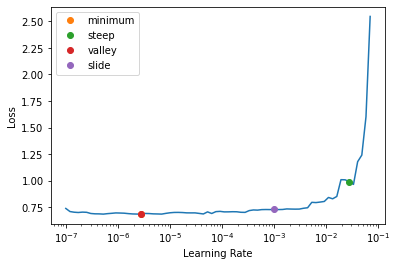

In [20]:
reset_randomness()
lrnr.lr_find(suggest_funcs=(minimum, steep, valley, slide))
# lrnr.lr_find(start_lr=2e-8, end_lr=2e-2, suggestions=True)

In [22]:
2.75e-06/60

4.5833333333333333e-08

In [23]:
# reset_randomness()
lr =2.75e-06

lrnr.fit_one_cycle(2, lr_max=slice( 4.5e-08 ,2.75e-06))

epoch,train_loss,valid_loss,accuracy,f1_score,f1_score,matthews_corrcoef,cohen_kappa_score,jaccard_score,time
0,0.672210,0.666496,0.904282,0.904282,0.474868,0.000000,0.000000,0.817726,17:52
1,0.647352,0.647217,0.904282,0.904282,0.474868,0.000000,0.000000,0.817726,17:50


In [25]:
1.375e-06/60

2.2916666666666667e-08

In [ ]:
lrnr.dls = dls_dr # lrnr.dls = dls 交換
# lr2 = lr/2
lrnr.fit_one_cycle(3, lr_max = slice(2.29e-08, 1.375e-06))

epoch,train_loss,valid_loss,accuracy,f1_score,f1_score,matthews_corrcoef,cohen_kappa_score,jaccard_score,time
0,0.592733,0.563772,0.890848,0.890848,0.694287,0.388927,0.388652,0.828703,1:11:09


In [ ]:
lrnr.fit_one_cycle(1, lr_max=slice( 4.5e-08 ,2.75e-06))

In [ ]:
reset_randomness()
lrnr.fit_one_cycle(1, lr_max=slice(5e-7, 5e-4))

------------------------------------------------------------------------------


In [ ]:
lrnr.save(f'fn_cf-b{trn_bs}-frozen-cl1_lr5En3-cl1_lr5En3')

In [ ]:
lrnr.unfreeze()

In [ ]:
reset_randomness()
_, _, preds = lrnr.get_preds(with_decoded=True)
vld_df.assign(prediction=preds.tolist())[[
    'paragraph', 'target_num', 'offset_start', 'offset_end', 'category', 'claim','prediction'
]].to_json(
    '/content/drive/MyDrive/FinNUM_dataset/dev_20220105.json',
    orient='records',
    indent=2)

In [ ]:
tst_dl = torch.load(DATA_DIR / 'finnum2_test_dl.pth')
reset_randomness()
_, _, preds = lrnr.get_preds(dl=tst_dl, with_decoded=True)
tst_df.assign(prediction=preds.tolist())[[
    'tweet', 'target_num', 'offset', 'target_cashtag', 'Test_id', 'prediction'
]].to_json(
    DATA_DIR / f'CYUT_test_0.json',
    orient='records',
    indent=2)

# batch size

In [ ]:
reset_randomness()
p_lrnr = lrnr.load(f'fn_cf-b8-frozen-cl1_lr5En3-cl1_lr5En3')
del lrnr
del p_lrnr.dls
p_lrnr.dls = torch.load(DATA_DIR / f'finnum2_dls-b8.pth')
p_lrnr.unfreeze()

In [ ]:
reset_randomness()
p_lrnr.fit_one_cycle(1, lr_max=slice(5e-7, 5e-4))

In [ ]:
p_lrnr.fit_one_cycle(1, lr_max=slice(5e-7, 5e-4))

In [ ]:
del p_lrnr.dls
p_lrnr.dls = torch.load(DATA_DIR / f'finnum2_dls-b12.pth')

In [ ]:
p_lrnr.fit_one_cycle(1, lr_max=slice(5e-7, 5e-4))

In [ ]:
p_lrnr.fit_one_cycle(1, lr_max=slice(5e-8, 5e-5))

In [ ]:
p_lrnr.fit_one_cycle(1, lr_max=slice(1e-8, 1e-5))

# double redaction